In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','last_review'],axis=1,inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [8]:
df.shape

(38843, 9)

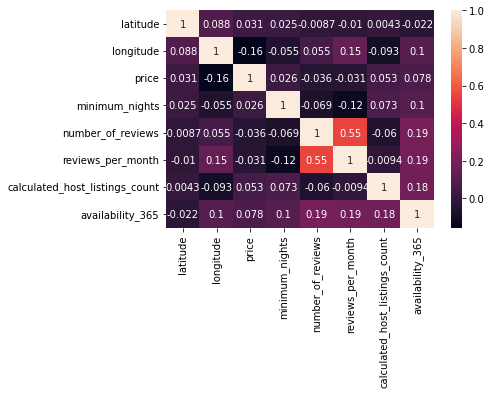

In [9]:
sns.heatmap(df.corr(),annot=True)

In [10]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['room_type'] = le.fit_transform(df['room_type'])

In [13]:
x = df.drop(['price'],axis=1)
y=df['price']

In [14]:
x

,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,1,9,0.21,6,365
1,40.75362,-73.98377,0,1,45,0.38,2,355
3,40.68514,-73.95976,0,1,270,4.64,1,194
4,40.79851,-73.94399,0,10,9,0.10,1,0
5,40.74767,-73.97500,0,3,74,0.59,1,129
...,...,...,...,...,...,...,...,...
48782,40.78099,-73.95366,1,1,1,1.00,1,147
48790,40.75104,-73.81459,1,1,1,1.00,6,339
48799,40.54179,-74.14275,1,1,1,1.00,1,87
48805,40.80787,-73.92400,0,1,2,2.00,1,40


In [15]:
y

0        149
1        225
3         89
4         80
5        200
        ... 
48782    129
48790     45
48799    235
48805    100
48852     30
Name: price, Length: 38843, dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = sc.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
#DropOut
from tensorflow.keras.layers import Dropout
ann=Sequential()

ann.add(Dense(units=8,activation='relu'))

ann.add(Dense(units=7,activation='relu'))


ann.add(Dense(units=1))

ann.compile(optimizer='adam',loss='mse')

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [20]:
ann.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/300
850/850 [==============================] - 3s 2ms/step - loss: 54821.4531 - val_loss: 27989.7188
Epoch 2/300
850/850 [==============================] - 2s 2ms/step - loss: 38226.3633 - val_loss: 26575.9219
Epoch 3/300
850/850 [==============================] - 2s 2ms/step - loss: 37831.3945 - val_loss: 26437.9199
Epoch 4/300
850/850 [==============================] - 2s 2ms/step - loss: 37734.1523 - val_loss: 26367.7285
Epoch 5/300
850/850 [==============================] - 1s 2ms/step - loss: 37673.1250 - val_loss: 26311.1348
Epoch 6/300
850/850 [==============================] - 2s 2ms/step - loss: 37624.3477 - val_loss: 26260.0215
Epoch 7/300
850/850 [==============================] - 2s 2ms/step - loss: 37582.5781 - val_loss: 26254.4688
Epoch 8/300
850/850 [==============================] - 1s 2ms/step - loss: 37539.1836 - val_loss: 26232.5273
Epoch 9/300
850/850 [==============================] - 2s 2ms/step - loss: 37505.2188 - val_loss: 26164.4062
Epoch 10/300
850/85

In [21]:
loss=pd.DataFrame(ann.history.history)
loss.head()

,loss,val_loss
0,54821.453125,27989.718750
1,38226.363281,26575.921875
2,37831.394531,26437.919922
3,37734.152344,26367.728516
4,37673.125000,26311.134766


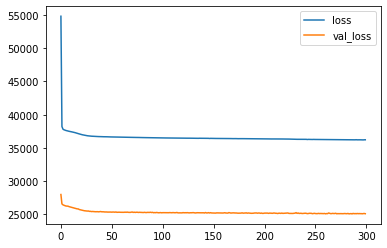

In [22]:
loss.plot()

In [23]:
ann.evaluate(xtrain,ytrain)

850/850 [==============================] - 1s 1ms/step - loss: 36182.8398


36182.83984375

In [24]:
ann.evaluate(xtest,ytest)

365/365 [==============================] - 0s 1ms/step - loss: 25103.6777


25103.677734375

In [25]:
ypred=ann.predict(xtest)

In [26]:
dic={'Actual Y':ytest,"Predicted Y":ypred.flatten()}
df1=pd.DataFrame(dic)

In [27]:
df1

,Actual Y,Predicted Y
29475,60,90.748283
12661,95,97.584480
5865,195,178.838318
8623,91,156.848770
14847,70,67.094780
...,...,...
6239,125,126.368179
38453,50,61.295185
32574,225,291.834015
12485,145,203.829941


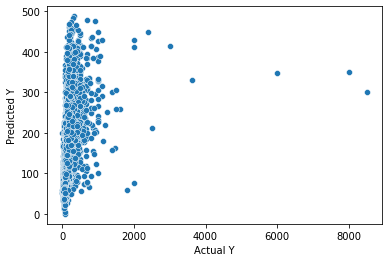

In [28]:
sns.scatterplot(data=df1,x='Actual Y',y='Predicted Y')

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
print(f'MSE: {mean_squared_error(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}')
print(f'Score: {r2_score(ytest,ypred)}')

MSE: 25103.675070203815
RMSE: 158.44139317174606
Score: 0.18420000496086963
